In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
import geopy
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

In [2]:
df= pd.read_csv("advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


- Alteração da coluna com nome "Male" para "Sex"

In [4]:
df.rename({'Male': 'Sex'}, axis=1, inplace=True)

- Extração das início das horas para que possamos fazer algum tipo de gráfico ou previsão com relação ao horário.

In [5]:
def extrair(coluna):
    return coluna[11:13]

- Efetivação da função acima, já efetuando a conversão para numérico.

In [6]:
df['Hora'] = pd.to_numeric(df['Timestamp'].map(extrair))

- A coluna Timestamp não será mais útil nessa avaliação

In [7]:
del df['Timestamp']

In [8]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Clicked on Ad,Hora
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3


- Alteração de algumas colunas para que fique melhor o entendimento em alguns gráficos.

In [9]:
def mudar(coluna):
    if coluna==0:
        return 'Homem'
    else:
        return 'Mulher'
def Ad(coluna):
    if coluna==0:
        return 'Não clicou'
    else:
        return 'Clicou'
    
df['Sexo'] = df['Sex'].map(mudar)
df['Click'] = df['Clicked on Ad'].map(Ad)

<Figure size 1080x432 with 0 Axes>

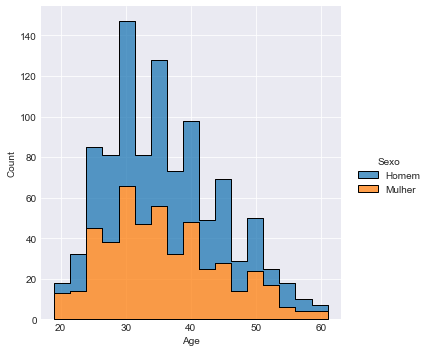

In [10]:
plt.figure(figsize=(15,6))
sns.displot(x='Age',hue='Sexo',data=df,element="step",multiple="stack")

- Podemos ver que a maioria é homem e tem entre 30 e 40 anos, as mulheres seguem o mesmo padrão de distribuição de dados.

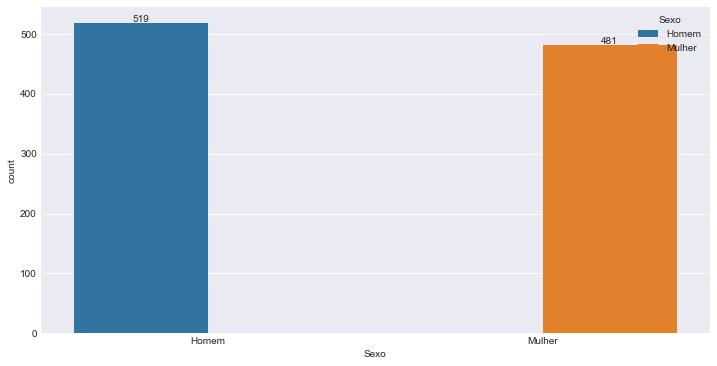

In [11]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Sexo',data=df,hue='Sexo')
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2),ha='center')

- Como descrito acima, temos mais homens do que mulheres.

<AxesSubplot:xlabel='Sexo', ylabel='Age'>

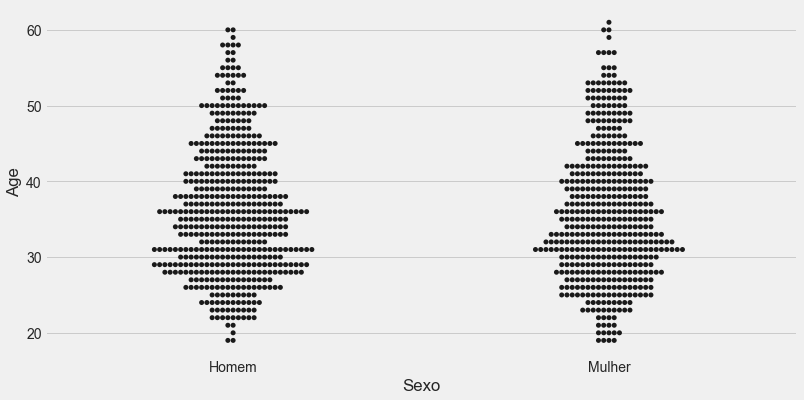

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.swarmplot(y="Age", x="Sexo", data=df, color=".1")

- Distribuição das idades com um Swarmplot.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Sex                       1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Hora                      1000 non-null   int64  
 10  Sexo                      1000 non-null   object 
 11  Click                     1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


<Figure size 864x648 with 0 Axes>

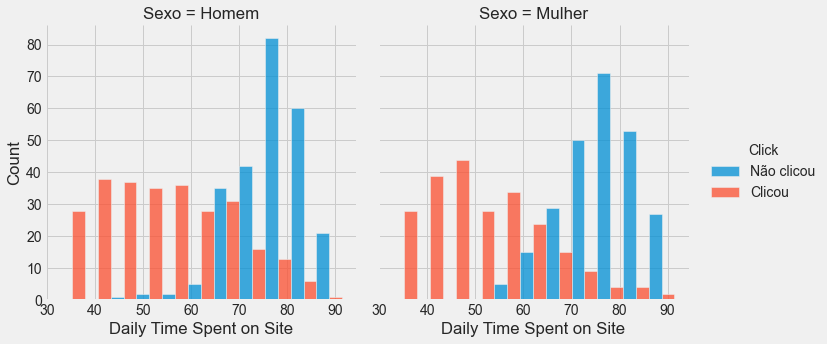

In [14]:
plt.figure(figsize=(12,9))
g=sns.displot(data=df, x="Daily Time Spent on Site", col='Sexo',hue='Click', multiple="dodge")


- Conseguimos ver que a quanto mais tempo é gasto no site, menos temos click nos AD's

<Figure size 864x648 with 0 Axes>

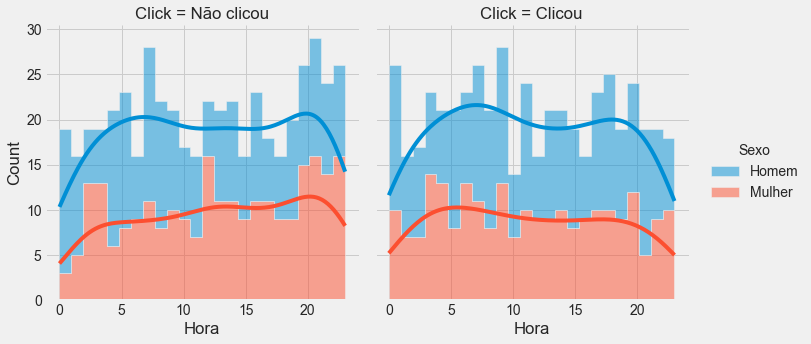

In [15]:
plt.figure(figsize=(12,9))
sns.displot(data=df,x="Hora",col="Click",kde=True,bins=24,hue="Sexo",element="step",multiple="stack")

- Para homens, o horário onde tem mais click's é entre 5 a.m e 9 a.m e entre 5 p.m e 8 p.m, para as mulheres, a variancia não é tão brusca, permanecendo quase constante entre 5 a.m e 8 p.m

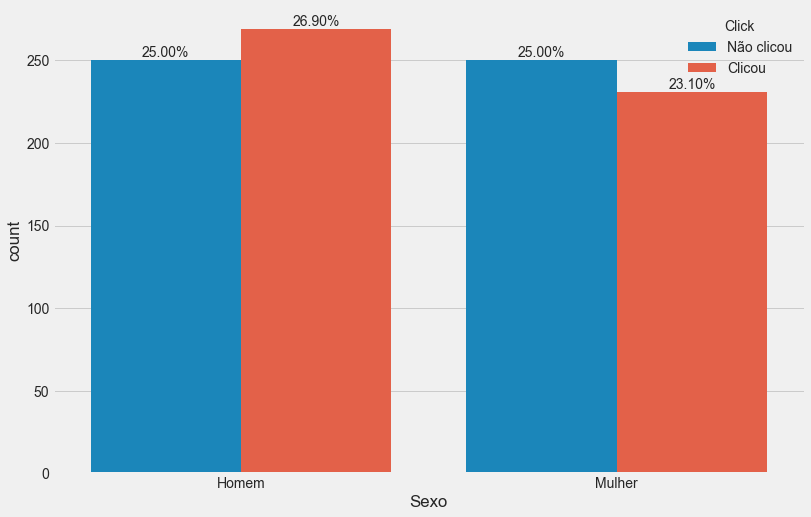

In [16]:

plt.figure(figsize=(12,8))
ax=sns.countplot(x='Sexo',data=df,hue='Click')
for p in ax.patches:
    ax.annotate('{:0.2f}%'.format(p.get_height()/len(df)*100), (p.get_x()+0.2, p.get_height()+2),ha='center')

- Quem mais clica nos anúncios são os homens, com uma diferença de 3,9%

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Click'>

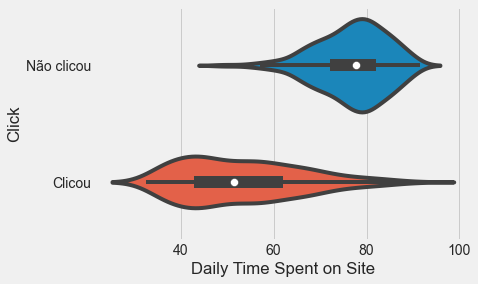

In [17]:
sns.violinplot(x='Daily Time Spent on Site', y='Click', data=df)

- Como dito anteriormente, quanto mais tempo você gasta no site, menor é a chance de você clicar em algum anúncio.

In [18]:
del df['Click']
del df['Sexo']

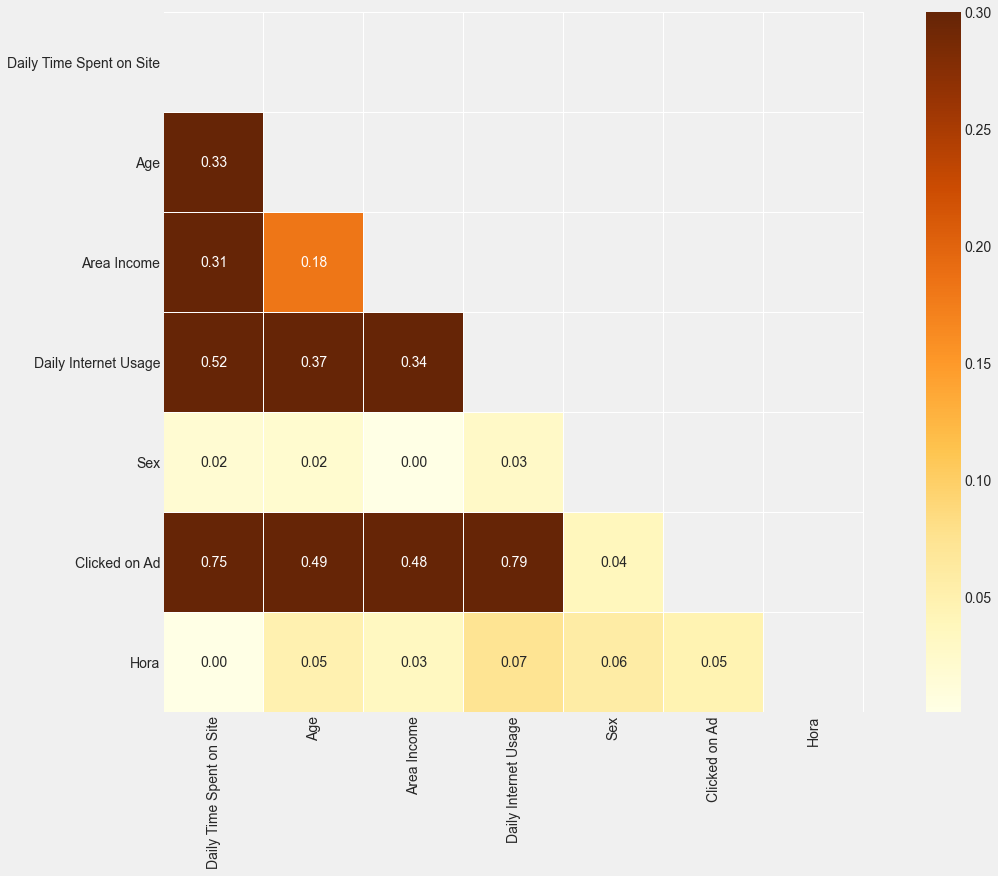

In [19]:
corr_data = df.corr()

mask = np.zeros_like(corr_data)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))

sns.heatmap(corr_data.abs(),cmap='YlOrBr', annot=True, fmt='.2f',square=True,mask=mask, vmax=.3,linewidths=.5)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
cat_data = df.select_dtypes(include = 'object')
num_data = df.select_dtypes(exclude = 'object')
#Fazer a troca de palavras pro números para que as analises possam ser feitas.
for i in cat_data.columns:
    cat_data[i] = LabelEncoder().fit_transform(cat_data[i])

In [21]:
df = pd.concat([cat_data, num_data], axis = 1)
df.head()

,Ad Topic Line,City,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Clicked on Ad,Hora
0,91,961,215,68.95,35,61833.90,256.09,0,0,0
1,464,903,147,80.23,31,68441.85,193.77,1,0,1
2,566,111,184,69.47,26,59785.94,236.50,0,0,20
3,903,939,103,74.15,29,54806.18,245.89,1,0,2
4,766,805,96,68.37,35,73889.99,225.58,0,0,3


In [22]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df.drop('Clicked on Ad',axis=1),df['Clicked on Ad'],test_size=0.30)

In [23]:
print('O dataset de treino possui {} clientes e o de teste {} clientes.'.format(x_treino.shape[0], x_teste.shape[0]))

O dataset de treino possui 700 clientes e o de teste 300 clientes.


In [24]:
from sklearn.tree import DecisionTreeClassifier
# criar um modelo de árvore de decisão
modelo_tree = DecisionTreeClassifier(max_depth=4)
modelo_tree.fit(x_treino,y_treino)

# verificar a acurácia do modelo
acc_tree = round(modelo_tree.score(x_treino,y_treino) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))
predicao_tree=modelo_tree.predict(x_teste)

Acurácia do modelo de Árvore de Decisão: 97.57


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_teste,predicao_tree))

print(confusion_matrix(y_teste,predicao_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       150
           1       0.95      0.95      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[143   7]
 [  8 142]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# criar um modelo de árvore de decisão aleatória
modelo_randon = RandomForestClassifier(n_estimators=200)
modelo_randon.fit(x_treino,y_treino)

# verificar a acurácia do modelo
acc_tree = round(modelo_tree.score(x_treino,y_treino) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))
predicao_randon=modelo_randon.predict(x_teste)

Acurácia do modelo de Árvore de Decisão: 97.57


In [29]:
print(classification_report(y_teste,predicao_randon))
print("\n")
print("---------Matriz de Confusão---------")
print(confusion_matrix(y_teste,predicao_randon))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       150
           1       0.95      0.95      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



---------Matriz de Confusão---------
[[143   7]
 [  7 143]]


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
SEED = 50
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results_tree = cross_val_score(modelo_tree, x_treino, y_treino, cv=cv, scoring = 'accuracy')
results_rdc = cross_val_score(modelo_randon, x_treino, y_treino, cv=cv, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
print("DecisionTreeClassifier")
intervalo(results_tree)
print("\n")
print("RandomForestClassifier")
intervalo(results_rdc)

DecisionTreeClassifier
Acurácia média: 94.86%
Intervalo de acurácia: [91.20% ~ 98.52%]


RandomForestClassifier
Acurácia média: 95.86%
Intervalo de acurácia: [92.94% ~ 98.77%]
